In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

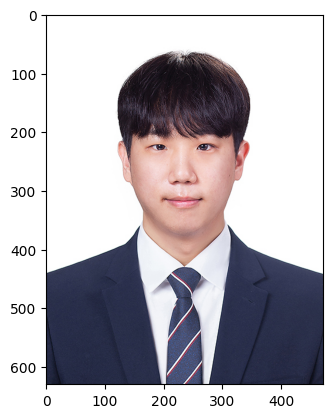

In [3]:
image_path = '/content/drive/MyDrive/aiffel/images/yunseo.jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(image)

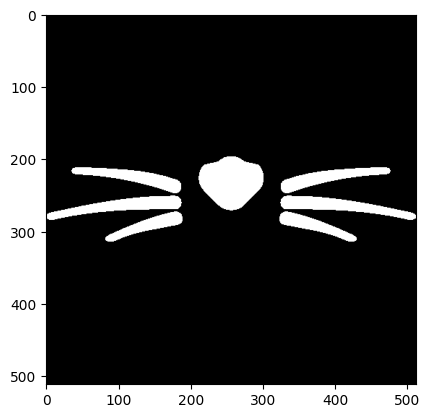

In [4]:
cat_whiskers_path = '/content/drive/MyDrive/aiffel/images/cat-whiskers.png'
whiskers = cv2.cvtColor(cv2.imread(cat_whiskers_path), cv2.COLOR_BGR2RGB)
whiskers = cv2.bitwise_not(whiskers)
plt.imshow(whiskers)

In [5]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(image, 1)

print(dlib_rects)

rectangles[[(139, 180) (324, 366)]]


In [6]:
image_show = image.copy()

In [7]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(image_show, (l, t), (r, b), (0, 255, 0), 4, lineType=cv2.LINE_AA)

In [8]:
model_path = '/content/drive/MyDrive/aiffel/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [9]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(image_show, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(image_show, point, 2, (0, 255, 255), -1)


In [11]:
whiskers_sticker = whiskers

In [12]:
# Extract the alpha channel
whiskers_mask = np.any(whiskers_sticker[:, :, :3] != [255, 255, 255], axis=-1)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    nose_middle = landmark[34]
    lib_middle = landmark[52]
    w = h = dlib_rect.width()

    x = nose_middle[0]
    y = int((lib_middle[1] + nose_middle[1]) / 2)

    refined_x = x - w // 2
    refined_y = y - h // 2

    if refined_x < 0:
        whiskers_sticker = whiskers_sticker[:, -refined_x:]
        refined_x = 0

    if refined_y < 0:
        whiskers_sticker = whiskers_sticker[-refined_y:, :]
        refined_y = 0

    whiskers_sticker = cv2.resize(whiskers, (w, h))

    sticker_area = image_show[refined_y:refined_y + whiskers_sticker.shape[0], refined_x:refined_x + whiskers_sticker.shape[1]]

    image_show[refined_y:refined_y + whiskers_sticker.shape[0], refined_x:refined_x + whiskers_sticker.shape[1]] = \
        np.where(whiskers_sticker == 0, sticker_area, whiskers_sticker).astype(np.uint8)

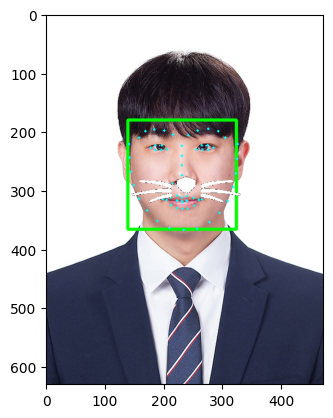

In [13]:
plt.imshow(image_show)
plt.show()

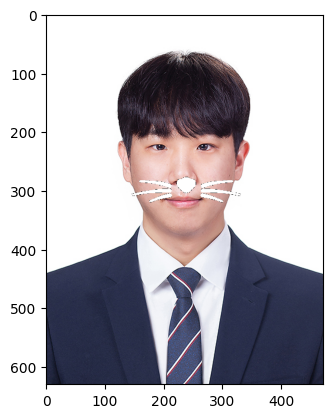

In [15]:
sticker_area = image[refined_y:refined_y +whiskers_sticker.shape[0], refined_x:refined_x+whiskers_sticker.shape[1]]

image[refined_y:refined_y +whiskers_sticker.shape[0], refined_x:refined_x+whiskers_sticker.shape[1]] = \
    np.where(whiskers_sticker==0,sticker_area,whiskers_sticker).astype(np.uint8)
plt.imshow(image)
plt.show()